<a href="https://colab.research.google.com/github/mariaelisagmt/analise-dados-git-github/blob/main/AnaliseLivros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de Livros

Dataset: Goodbooks-10k

Iniciando Análise de Dados de Livros (Goodbooks-10k)...
Carregando dados de: https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv
Dados carregados com sucesso!

--- Limpeza e Preparação dos Dados ---

1. Informações iniciais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_ti

<ipython-input-2-d0059d696566>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['original_publication_year'].fillna(moda_ano, inplace=True)
<ipython-input-2-d0059d696566>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

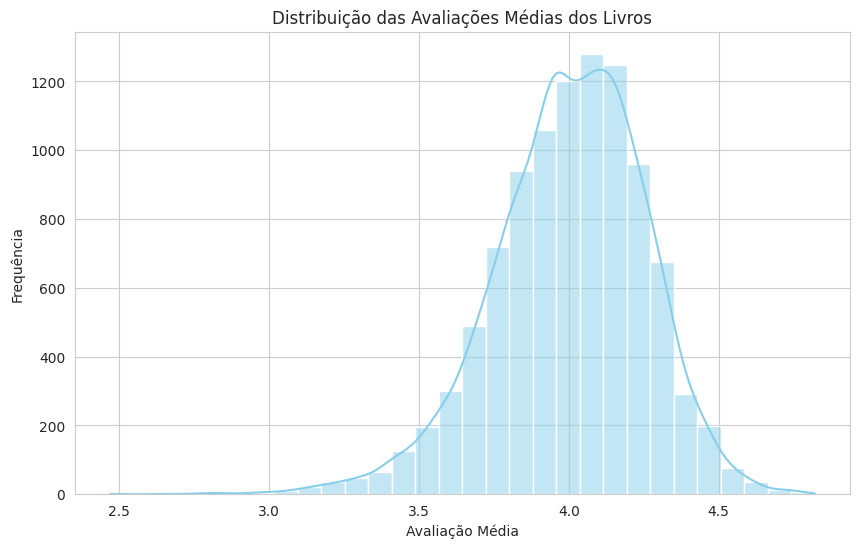

   Gráfico 1: Distribuição das Avaliações Médias gerado.


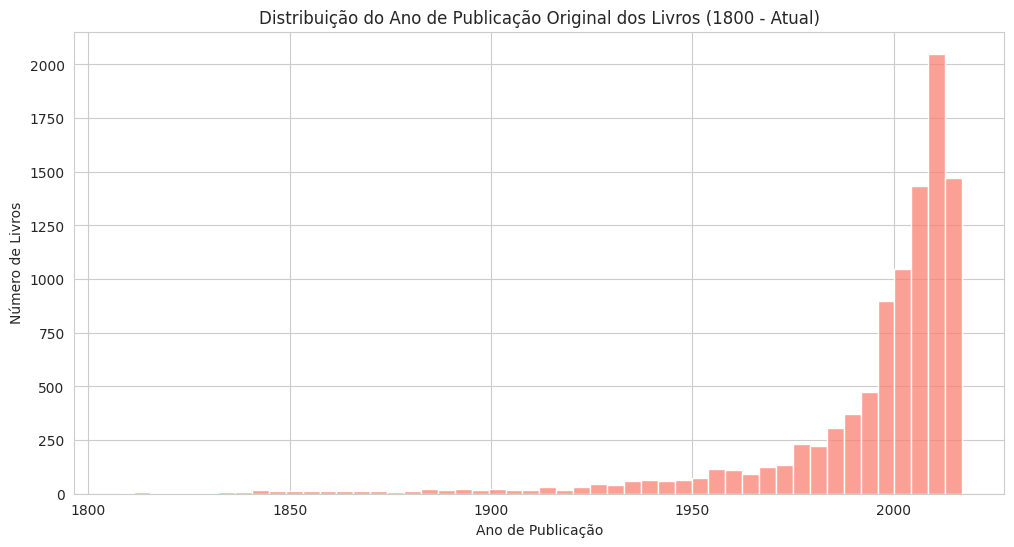

   Gráfico 2: Distribuição do Ano de Publicação gerado.


<ipython-input-2-d0059d696566>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=autores_top_plot.index, y=autores_top_plot.values, palette='viridis')


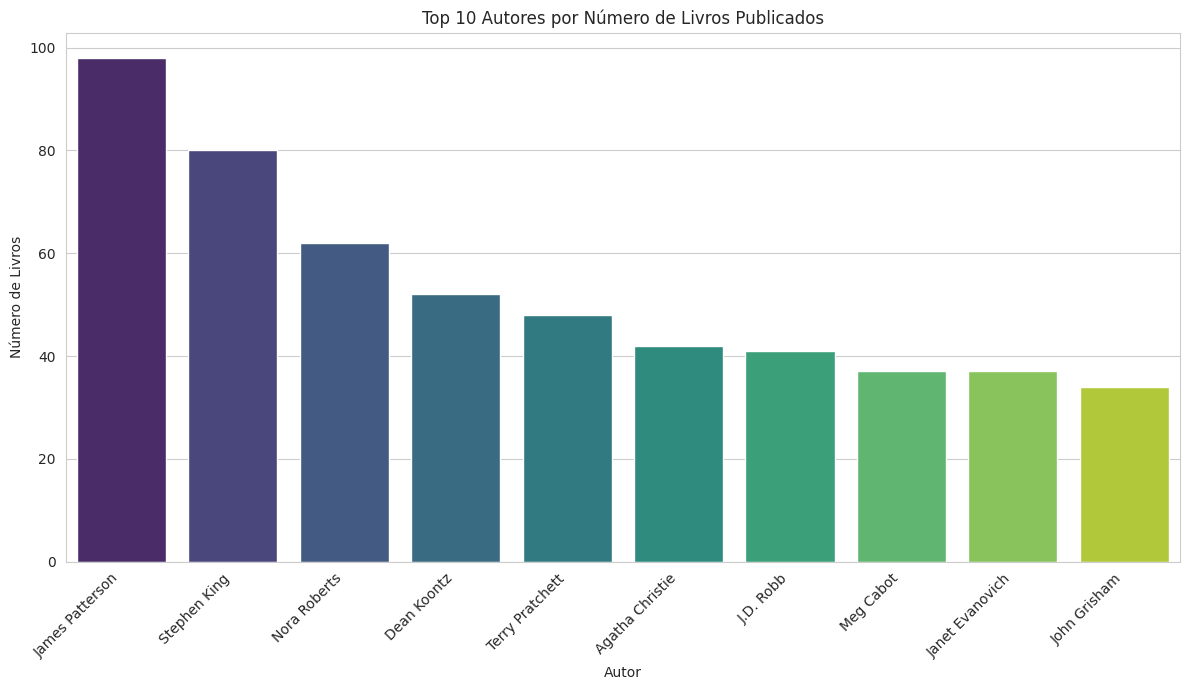

   Gráfico 3: Top 10 Autores gerado.


<ipython-input-2-d0059d696566>:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=idiomas_top_plot.index, y=idiomas_top_plot.values, palette='mako')


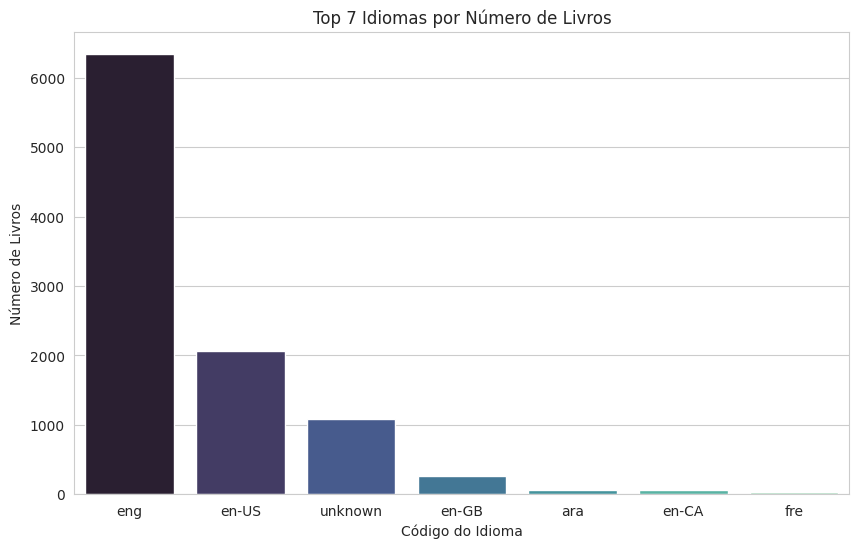

   Gráfico 4: Contagem de Livros por Idioma gerado.


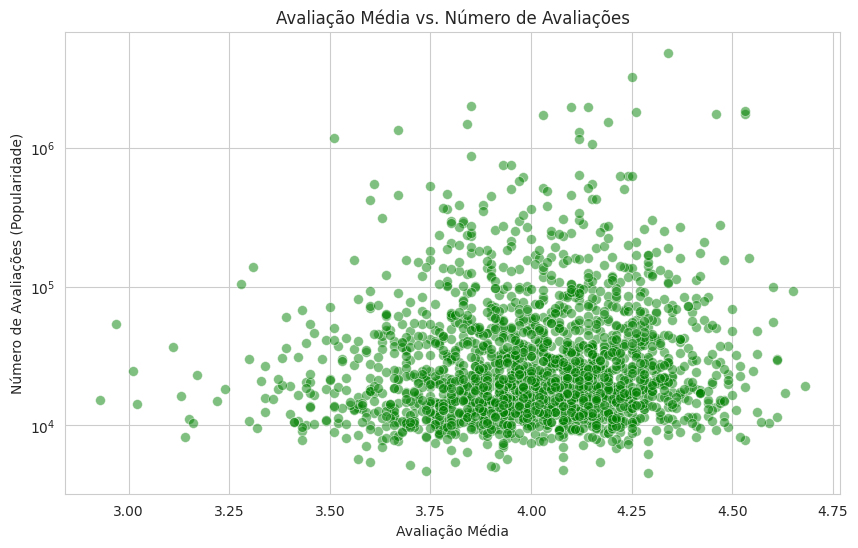

   Gráfico 5: Relação Avaliação Média vs. Número de Avaliações gerado.


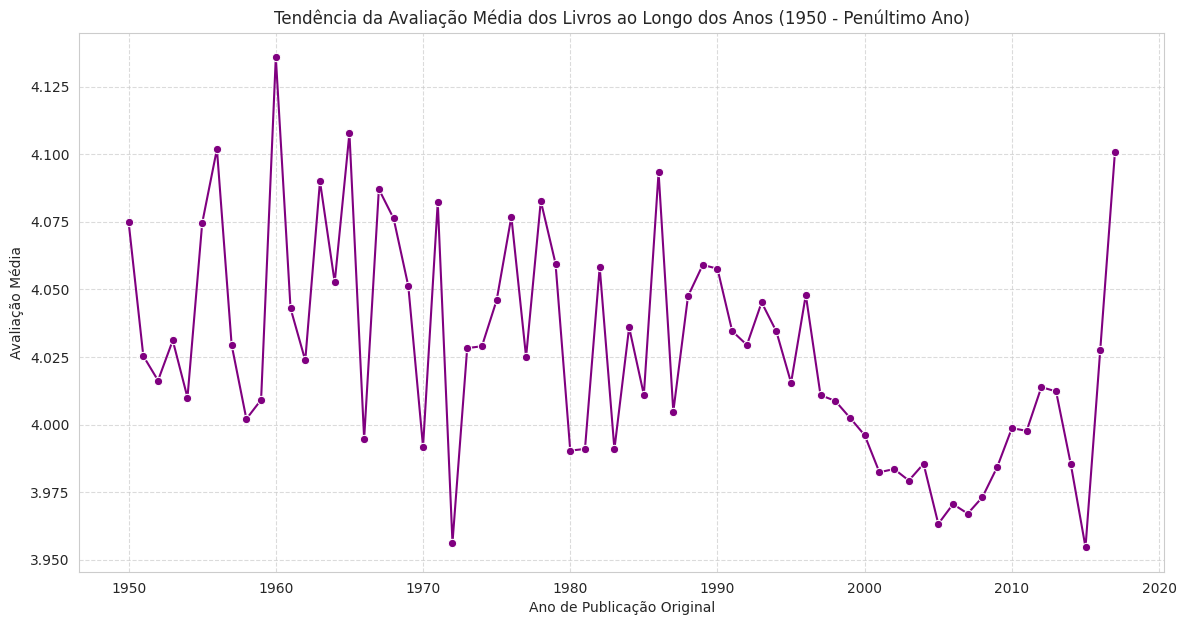

   Gráfico 6: Tendência da Avaliação Média ao Longo dos Anos gerado.

--- Análise de Livros Concluída ---


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Goodbooks-10k
DATA_URL = "https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv"

def carregar_dados(url):
    """Carrega os dados de uma URL e retorna um DataFrame pandas."""
    print(f"Carregando dados de: {url}")
    try:
        df = pd.read_csv(url)
        print("Dados carregados com sucesso!")
        return df
    except Exception as e:
        print(f"Erro ao carregar os dados: {e}")
        return None

def limpeza_preparacao_dados(df):
    """Realiza a limpeza e preparação básica dos dados."""
    if df is None:
        return None

    print("\n--- Limpeza e Preparação dos Dados ---")

    print("\n1. Informações iniciais do DataFrame:")
    df.info()

    print(f"\n2. Valores ausentes antes do tratamento:\n{df.isnull().sum()}")

    # Para 'original_publication_year', podemos preencher com a mediana ou moda, ou remover linhas.
    if 'original_publication_year' in df.columns:
        moda_ano = df['original_publication_year'].mode()[0]
        df['original_publication_year'].fillna(moda_ano, inplace=True)
        df['original_publication_year'] = df['original_publication_year'].astype(int)

    # Para 'language_code', podemos preencher com 'unknown' ou a moda.
    if 'language_code' in df.columns:
        df['language_code'].fillna('unknown', inplace=True)

    # Para 'authors', vamos pegar apenas o primeiro autor para simplificar algumas análises
    if 'authors' in df.columns:
        df['primeiro_autor'] = df['authors'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else 'Desconhecido')

    # Verificar novamente os valores ausentes
    print(f"\n3. Valores ausentes após o tratamento:\n{df.isnull().sum()}")

    # Remover colunas que não usaremos diretamente nesta análise para simplificar
    colunas_para_remover = ['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
                              'isbn', 'isbn13', 'original_title', 'image_url', 'small_image_url',
                              'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']
    df.drop(columns=[col for col in colunas_para_remover if col in df.columns], inplace=True, errors='ignore')
    print(f"\n4. Colunas menos relevantes removidas para esta análise.")


    print("\nLimpeza e preparação concluídas.")
    return df

def analise_exploratoria(df):
    """Realiza a análise exploratória dos dados."""
    if df is None:
        return

    print("\n--- Análise Exploratória dos Dados ---")

    print("\n1. Visualizando as primeiras 5 linhas do dataset processado:")
    print(df.head())

    print("\n2. Estatísticas descritivas das colunas numéricas:")
    print(df.describe())

    print("\n3. Livros com as maiores avaliações médias (Top 10):")
    top_10_avaliados = df.sort_values(by='average_rating', ascending=False).head(10)
    print(top_10_avaliados[['title', 'primeiro_autor', 'average_rating', 'ratings_count']])

    print("\n4. Livros com maior número de avaliações (Top 10) - Popularidade:")
    top_10_populares = df.sort_values(by='ratings_count', ascending=False).head(10)
    print(top_10_populares[['title', 'primeiro_autor', 'average_rating', 'ratings_count']])

    print("\n5. Autores com mais livros publicados no dataset (Top 10 - considerando o primeiro autor):")
    autores_mais_publicam = df['primeiro_autor'].value_counts().nlargest(10)
    print(autores_mais_publicam)

    print("\n6. Contagem de livros por idioma (Top 10):")
    contagem_idiomas = df['language_code'].value_counts().nlargest(10)
    print(contagem_idiomas)

    print("\n7. Anos de publicação com mais livros (Top 10):")
    if 'original_publication_year' in df.columns:
        anos_com_mais_livros = df['original_publication_year'].value_counts().nlargest(10)
        print(anos_com_mais_livros)

def visualizacoes(df):
    """Cria algumas visualizações dos dados."""
    if df is None:
        return

    print("\n--- Visualizações ---")
    sns.set_style("whitegrid")

    # 1. Distribuição das Avaliações Médias
    plt.figure(figsize=(10, 6))
    sns.histplot(df['average_rating'], kde=True, bins=30, color='skyblue')
    plt.title('Distribuição das Avaliações Médias dos Livros')
    plt.xlabel('Avaliação Média')
    plt.ylabel('Frequência')
    plt.show()
    print("   Gráfico 1: Distribuição das Avaliações Médias gerado.")

    # 2. Distribuição do Ano de Publicação Original
    if 'original_publication_year' in df.columns:
        # Filtrar anos muito antigos ou futuros que podem ser erros ou outliers para melhor visualização
        df_anos_filtrados = df[(df['original_publication_year'] > 1800) & (df['original_publication_year'] <= pd.Timestamp.now().year)]
        plt.figure(figsize=(12, 6))
        sns.histplot(df_anos_filtrados['original_publication_year'], kde=False, bins=50, color='salmon')
        plt.title('Distribuição do Ano de Publicação Original dos Livros (1800 - Atual)')
        plt.xlabel('Ano de Publicação')
        plt.ylabel('Número de Livros')
        plt.show()
        print("   Gráfico 2: Distribuição do Ano de Publicação gerado.")

    # 3. Top 10 Autores por Número de Livros
    plt.figure(figsize=(12, 7))
    autores_top_plot = df['primeiro_autor'].value_counts().nlargest(10)
    sns.barplot(x=autores_top_plot.index, y=autores_top_plot.values, palette='viridis')
    plt.title('Top 10 Autores por Número de Livros Publicados')
    plt.xlabel('Autor')
    plt.ylabel('Número de Livros')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout() # Ajusta o layout para não cortar os labels
    plt.show()
    print("   Gráfico 3: Top 10 Autores gerado.")

    # 4. Contagem de Livros por Idioma (Top 7)
    plt.figure(figsize=(10, 6))
    idiomas_top_plot = df['language_code'].value_counts().nlargest(7)
    sns.barplot(x=idiomas_top_plot.index, y=idiomas_top_plot.values, palette='mako')
    plt.title('Top 7 Idiomas por Número de Livros')
    plt.xlabel('Código do Idioma')
    plt.ylabel('Número de Livros')
    plt.show()
    print("   Gráfico 4: Contagem de Livros por Idioma gerado.")

    # 5. Relação entre Avaliação Média e Número de Avaliações
    plt.figure(figsize=(10, 6))
    sample_df = df.sample(n=2000 if len(df) > 2000 else len(df), random_state=42)
    sns.scatterplot(data=sample_df, x='average_rating', y='ratings_count', alpha=0.5, color='green', edgecolor='w', s=50)
    plt.title('Avaliação Média vs. Número de Avaliações')
    plt.xlabel('Avaliação Média')
    plt.ylabel('Número de Avaliações (Popularidade)')
    plt.yscale('log') # Usar escala logarítmica para melhor visualização da popularidade
    plt.show()
    print("   Gráfico 5: Relação Avaliação Média vs. Número de Avaliações gerado.")

    # 6. Tendência da Avaliação Média ao Longo dos Anos
    if 'original_publication_year' in df.columns:
        # Agrupar por ano e calcular a média da avaliação
        df_anos_filtrados = df[(df['original_publication_year'] >= 1950) & (df['original_publication_year'] <= pd.Timestamp.now().year -1)] #Exclui ano corrente
        media_avaliacao_por_ano = df_anos_filtrados.groupby('original_publication_year')['average_rating'].mean().reset_index()
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=media_avaliacao_por_ano, x='original_publication_year', y='average_rating', marker='o', color='purple')
        plt.title('Tendência da Avaliação Média dos Livros ao Longo dos Anos (1950 - Penúltimo Ano)')
        plt.xlabel('Ano de Publicação Original')
        plt.ylabel('Avaliação Média')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
        print("   Gráfico 6: Tendência da Avaliação Média ao Longo dos Anos gerado.")


def main():
    """Função principal para executar a análise de dados de livros."""
    print("Iniciando Análise de Dados de Livros (Goodbooks-10k)...")

    # Etapa 1: Carregar os dados
    dataframe_livros = carregar_dados(DATA_URL)

    # Etapa 2: Limpeza e Preparação dos Dados
    dataframe_livros_proc = limpeza_preparacao_dados(dataframe_livros)

    if dataframe_livros_proc is not None:
        # Etapa 3: Análise Exploratória dos Dados
        analise_exploratoria(dataframe_livros_proc)

        # Etapa 4: Visualizações
        visualizacoes(dataframe_livros_proc)
    else:
        print("Análise não pode prosseguir devido a erro no carregamento ou preparação dos dados.")

    print("\n--- Análise de Livros Concluída ---")

if __name__ == '__main__':
    main()